In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Coleta de Dados:

Busque uma base de dados que seja apropriada para um problema de regressão linear simples. A base deve conter pelo menos uma variável dependente e uma variável independente.



In [2]:
import pandas as pd

df = pd.read_csv('USA_Housing.csv')

df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


Pré-processamento de Dados:

Elementos Faltantes: Preencha ou remova quaisquer elementos faltantes na base de dados (caso existam).

Variáveis Categóricas: Se houver variáveis categóricas, transforme-as em variáveis numéricas.

Normalização: Normalize as variáveis se necessário.

Separação de Dados: Divida a base em conjuntos de treino e teste.

In [3]:
df.isnull().sum()
#Checando Valores nulos, e chegando a conclusão que não possui nenhum.


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Normalizando as variaveis e as dividindo em conjunto de treino e teste.

In [4]:

# Separando as variáveis de entrada (YearsExperience) e saída (Salary)
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = df['Price']

# Criando o objeto para a padronização
scaler = preprocessing.StandardScaler()

# Ajustando e transformando os dados de entrada e os colocando de volta no Dataframe

X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Dividindo os dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2)


Implementação e Treino:

Implemente e treine três algoritmos de regressão diferentes (por exemplo, Regressão Linear, Regressão Polinomial e Regressão por Floresta Randômica).

In [5]:
#Regressão Linear Múltipla
regressorLinear = LinearRegression()
X_train = pd.DataFrame(X_train) 
regressorLinear.fit(X_train, y_train)

#Regressão Polinomial Múltipla
poly = PolynomialFeatures(degree=2)  #Testei o dois 
XPoly = poly.fit_transform(X_train)
regressorPolinomial = LinearRegression()
regressorPolinomial.fit(XPoly, y_train)

#Regressão por Floresta Randômica
regressorFloresta = RandomForestRegressor(n_estimators=100, random_state=42)
regressorFloresta.fit(X_train, y_train) 

#A Regressão por Floresta Aleatória combina múltiplas árvores de decisão treinadas em subconjuntos aleatórios dos dados, produzindo uma previsão final por meio da média das previsões individuais. 
#Essa abordagem reduz overfitting e melhora a robustez do modelo para problemas de regressão.


#A principal diferença entre a regressão linear múltipla e a regressão polinomial múltipla está no fato de que as variáveis de entrada são elevadas a potências diferentes (exponenciais) para permitir que o modelo capture relações não lineares. 

#A regressão polinomial múltipla é útil quando a relação entre as variáveis não pode ser adequadamente modelada por uma linha reta, mas pode ser melhor representada por uma curva polinomial. 
#à medida que o grau do polinômio aumenta, o modelo pode se tornar mais complexo e suscetível a overfitting, ou seja, se ajustar demais aos dados de treinamento e não generalizar bem para novos dados. 

#Quando uma variável apenas é gerada (apenas um ponto) chamamos de regressão linear simples, porém quando temos para mais de um, o processo é chamado de regressão linear múltipla .


RandomForestRegressor(random_state=42)

Avaliação de Modelos
* Use o conjunto de teste para fazer previsões com cada um dos modelos treinados.
* Calcule métricas de avaliação como RMSE e MAE para cada modelo.


Comparação de Desempenho:
* Compare as métricas de avaliação entre os três modelos.

* Identifique qual algoritmo teve o melhor desempenho e justifique sua escolha.

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Previsões para Regressão Linear
y_pred_linear = regressorLinear.predict(X_test)
rmse_linear = math.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Previsões para Regressão Polinomial Múltipla
XPoly_test = poly.transform(X_test)
y_pred_poly = regressorPolinomial.predict(XPoly_test)
rmse_poly = math.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Previsões para Regressão por Floresta Randomica
y_pred = regressorFloresta.predict(X_test)
rmse_floresta = np.sqrt(mean_squared_error(y_test, y_pred))
mae_floresta = mean_absolute_error(y_test, y_pred)
#

# Exibindo as métricas de avaliação

print("\nRegressão Polinomial Múltipla:")
print("RMSE:", rmse_poly)
print("MAE:", mae_poly)

print("\nRegressão Linear Múltipla:")
print("RMSE:", rmse_linear)
print("MAE:", mae_linear)

print("\nRegressão por Floresta Randomica:")
print("RMSE:", rmse_floresta)
print("MAE:", mae_floresta)



Regressão Polinomial Múltipla:
RMSE: 100495.1150494018
MAE: 80886.67204231027

Regressão Linear Múltipla:
RMSE: 100444.06055558483
MAE: 80879.09723489445

Regressão por Floresta Randomica:
RMSE: 120262.3333727779
MAE: 94651.25102041363


Relatorio:
- O modelo de Regressão Linear Múltipla parece ter um desempenho ligeiramente melhor, 
  com um RMSE menor e um MAE menor em comparação com os outros modelos.

Conclusões:
- Com base nas métricas de avaliação, o modelo de Regressão Polinomial Múltipla é a escolha preferida para este conjunto de dados específico.


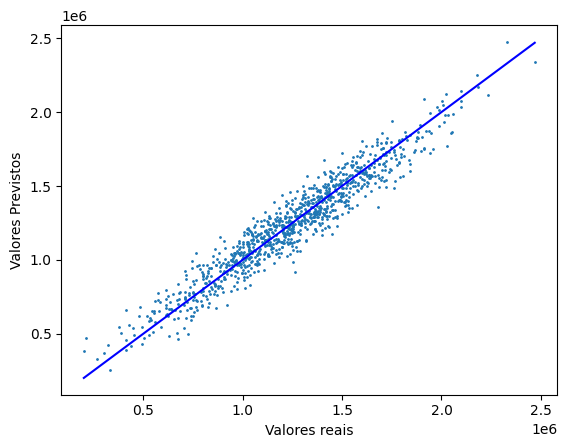

In [7]:
plt.scatter(y_test, y_pred_linear, label='Valores Previstos vs Valores Reais', s=1)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='blue', label='Linha de Referência' )
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.show()
#Como são regressões múltiplas, eu não tenho como plotar a curva/reta da regressão, pois há várias dimensões, como há várias varíaveis independentes
#Então, esse gráfico mostra apenas uma comparação dos valores previstos e dos valores reais, a linha azul é uma linha de referência, quanto mais próximos os pontos estão da linha, maior o acerto do meu modelo

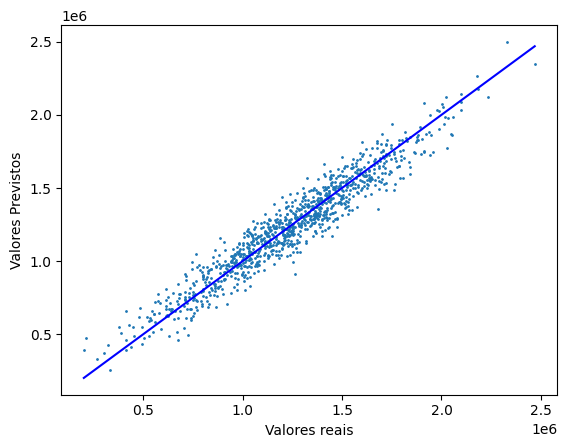

In [8]:
plt.close()
plt.scatter(y_test, y_pred_poly, label='Valores Previstos vs Valores Reais', s=1)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='blue', label='Linha de Referência' )
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.show()


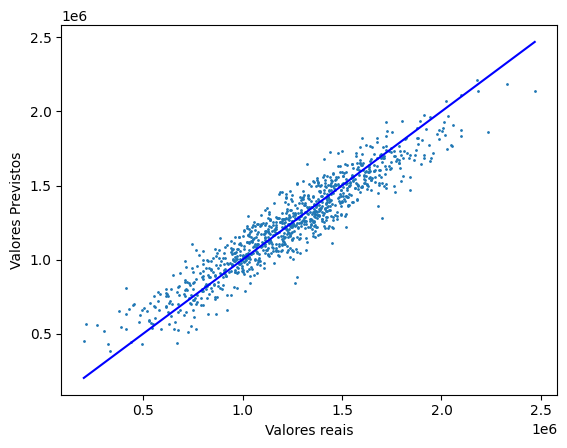

In [9]:
plt.close()
plt.scatter(y_test, y_pred, label='Valores Previstos vs Valores Reais', s=1)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='blue', label='Linha de Referência' )
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.show()